In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#step 3 is extracting input columns(features) and output(target) column
data['YearsExperienc']

KeyError: 'YearsExperienc'

In [4]:
data.iloc[:,0:1]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [31]:
X=data.iloc[:,0:1].values

In [32]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [46]:
y=data.iloc[:,1].values

In [47]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [35]:
#step4:Crossvalidation
#train,test,split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
X_train.shape

(24, 1)

In [58]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [60]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
regressor.predict(X_test[0].reshape(1,1))

array([123719.05825944])

In [62]:
#salary predictor function
def salarypredictor(experience):
    print(regressor.predict(np.array(experience).reshape(1,1))[0])
    

In [64]:
salarypredictor(500)

4671415.797840214


In [65]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [66]:
exp=data['YearsExperience'].values

In [67]:
exp

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

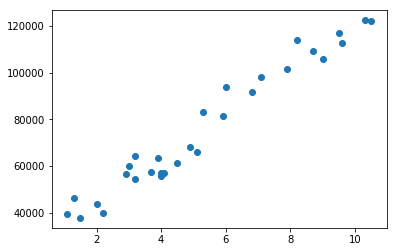

In [70]:
plt.scatter(exp,y)

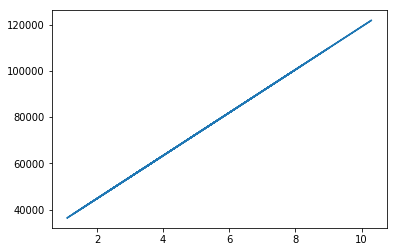

In [69]:
plt.plot(X_train,regressor.predict(X_train))

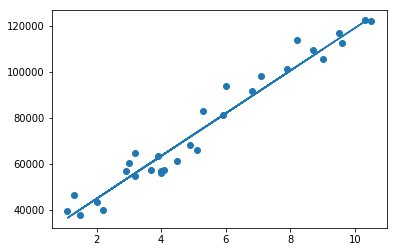

In [72]:

plt.scatter(exp,y)
plt.plot(X_train,regressor.predict(X_train))


In [73]:
m=regressor.coef_[0]#straight line equation
c=regressor.intercept_
m*500+c

4671415.797840214

In [74]:
from sklearn.metrics import r2_score

In [76]:
y_pred=regressor.predict(X_test)

In [77]:
y_pred

array([123719.05825944, 114428.56440943,  81911.83593439,  92131.3791694 ,
        64259.89761937, 106996.16932942])

In [78]:
r2_score(y_test,y_pred)

0.9087267888374626

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


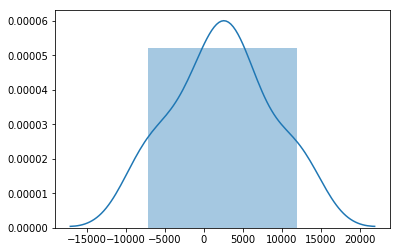

In [79]:
sns.distplot(y_test-y_pred)